In [1]:
import networkx as nx
import pandas as pd

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


from Utils import evaluation_measures as ev

In [2]:
network = 'toy-example'
results = pd.read_csv('../Results/All Backbones/' + network + '.csv')
labels = pd.read_csv('airports_labels.csv')

In [3]:
backbone_names = list(results.columns.values)
backbone_names.remove('source')
backbone_names.remove('target')
backbone_names.remove('weight')

# Initialize the Number of Edges to Keep

In [4]:
G = nx.from_pandas_edgelist(results[['source', 'target', 'weight']], edge_attr='weight')
k=30

# Extract Backbones with top K edges

In [5]:
backbones = dict()
for name in backbone_names:
    if 'alpha' in name:
            backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:k]
    else:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:k]
            
    backbones[name] = nx.from_pandas_edgelist(backbone_edges, edge_attr='weight')

# Extract the difference between the backbone and the global threshold

In [6]:
# diff_backbones = dict()
# common = 1
# for i, name in enumerate(backbones.keys()):

#     if name != 'global_score':
#         common = nx.intersection(backbones[name], backbones['global_score'])
#         diff_backbones[name] = ev.get_graph_difference(backbones[name], common)

In [7]:
# diff_backbones['common'] = common

In [8]:

# for name in diff_backbones:

#     backbone_edges = nx.to_pandas_edgelist(diff_backbones[name])

#     nodes = list(set(list(set(backbone_edges.source.values)) + list(set(backbone_edges.target.values))))
#     backbone_nodes = labels[labels['id'].isin(nodes)]

#     df_degree = pd.DataFrame(G.degree(), columns=['id', 'degree'])
#     df_degree = df_degree[df_degree['id'].isin(nodes)]

#     df_weighted_degree = pd.DataFrame(G.degree(weight='weight'), columns=['id', 'weighted_degree'])
#     df_weighted_degree = df_weighted_degree[df_weighted_degree['id'].isin(nodes)]

#     backbone_nodes = backbone_nodes.merge(df_degree)
#     backbone_nodes = backbone_nodes.merge(df_weighted_degree)

#     backbone = nx.from_pandas_edgelist(backbone_edges)
#     df_components = pd.DataFrame(columns=['id', 'component'])
#     for index, component in enumerate(nx.connected_components(backbone)):
#         df_1 = pd.DataFrame(G.subgraph(component).nodes(), columns=['id'])
#         df_1['component'] = index + 1
#         df_components = pd.concat([df_1, df_components], ignore_index=True)
#     backbone_nodes = backbone_nodes.merge(df_components, on='id')

#     backbone_edges.to_csv('../Results/All Backbones/toy-example/'+name+'-edges-airports.csv', index=False)
#     backbone_nodes.to_csv('../Results/All Backbones/toy-example/'+name+'-nodes-airports.csv', index=False)


In [12]:
k=int(0.1*results.shape[0])
#k= 30
G = nx.from_pandas_edgelist(results[['source', 'target', 'weight']], edge_attr='weight')
for name in backbone_names:

    if 'alpha' in name:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:k]

    else:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:k]

    #backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:k]
    nodes = list(set(list(set(backbone_edges.source.values)) + list(set(backbone_edges.target.values))))
    backbone_nodes = labels[labels['id'].isin(nodes)]

    df_degree = pd.DataFrame(G.degree(), columns=['id', 'degree'])
    df_degree = df_degree[df_degree['id'].isin(nodes)]

    df_weighted_degree = pd.DataFrame(G.degree(weight='weight'), columns=['id', 'weighted_degree'])
    df_weighted_degree = df_weighted_degree[df_weighted_degree['id'].isin(nodes)]

    backbone_nodes = backbone_nodes.merge(df_degree)
    backbone_nodes = backbone_nodes.merge(df_weighted_degree)

    backbone = nx.from_pandas_edgelist(backbone_edges)
    df_components = pd.DataFrame(columns=['id', 'component'])
    for index, component in enumerate(nx.connected_components(backbone)):
        df_1 = pd.DataFrame(G.subgraph(component).nodes(), columns=['id'])
        df_1['component'] = index + 1
        df_components = pd.concat([df_1, df_components], ignore_index=True)
    backbone_nodes = backbone_nodes.merge(df_components, on='id')

    backbone_edges.to_csv('../Results/All Backbones/significance/'+network+'/'+name+'-edges.csv', index=False)
    backbone_nodes.to_csv('../Results/All Backbones/significance/'+network+'/'+name+'-nodes.csv', index=False)

    # backbone_edges.to_csv('../Results/All Backbones/'+network+'/original-edges.csv', index=False)
    # backbone_nodes.to_csv('../Results/All Backbones/'+network+'/original-nodes.csv', index=False)
    # break
    


In [26]:
G = nx.from_pandas_edgelist(results[['source', 'target', 'weight']], edge_attr='weight')

In [15]:
k=int(0.25*results.shape[0])
k=30
G = nx.from_pandas_edgelist(results[['source', 'target', 'weight']], edge_attr='weight')
for name in backbone_names:

    if 'alpha' in name:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:k]

    else:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:k]

    #backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:k]
    nodes = list(set(list(set(backbone_edges.source.values)) + list(set(backbone_edges.target.values))))
    backbone_nodes = labels[labels['id'].isin(nodes)]

    df_degree = pd.DataFrame(G.degree(), columns=['id', 'degree'])
    df_degree = df_degree[df_degree['id'].isin(nodes)]

    df_weighted_degree = pd.DataFrame(G.degree(weight='weight'), columns=['id', 'weighted_degree'])
    df_weighted_degree = df_weighted_degree[df_weighted_degree['id'].isin(nodes)]

    backbone_nodes = backbone_nodes.merge(df_degree)
    backbone_nodes = backbone_nodes.merge(df_weighted_degree)

    backbone = nx.from_pandas_edgelist(backbone_edges)
    df_components = pd.DataFrame(columns=['id', 'component'])
    for index, component in enumerate(nx.connected_components(backbone)):
        df_1 = pd.DataFrame(G.subgraph(component).nodes(), columns=['id'])
        df_1['component'] = index + 1
        df_components = pd.concat([df_1, df_components], ignore_index=True)
    backbone_nodes = backbone_nodes.merge(df_components, on='id')

    #backbone_edges.to_csv('../Results/All Backbones/toy-example/'+name+'-edges-airports.csv', index=False)
    #backbone_nodes.to_csv('../Results/All Backbones/toy-example/'+name+'-nodes-airports.csv', index=False)


In [41]:
backbones.keys()

dict_keys(['mlf_score', 'df_alpha', 'nc_alpha', 'pf_alpha', 'lans_alpha', 'ecm_alpha', 'global_score', 'gloss_alpha'])

In [34]:
len(common_backbone)

17

In [88]:
backbone_names
reminder_graphs = dict()
for name in backbone_names:
    if 'alpha' in name:
            backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:k]
    else:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:k]
            
    reminder_graphs[name] = ev.get_graph_difference(nx.from_pandas_edgelist(backbone_edges, edge_attr='weight'), common_backbone)

AttributeError: 'dict' object has no attribute 'has_edge'

In [29]:
for gr in reminder_graphs:
    print(gr, len(reminder_graphs[gr]))

mlf_score 29
df_alpha 29
nc_alpha 26
pf_alpha 25
lans_alpha 36
ecm_alpha 38
global_score 26
gloss_alpha 29


In [30]:
for gr in backbones:
    print(gr, len(backbones[gr]))

mlf_score 29
df_alpha 29
nc_alpha 26
pf_alpha 25
lans_alpha 36
ecm_alpha 38
global_score 26
gloss_alpha 30


In [35]:
common_backbone.edges()

EdgeView([(736, 700)])

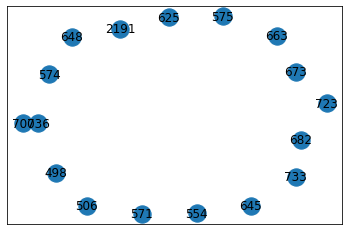

In [36]:
nx.draw_networkx(common_backbone)

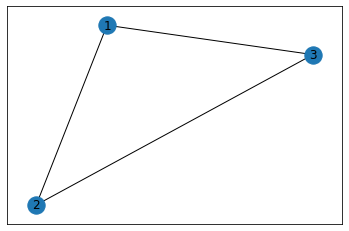

In [5]:
g = nx.Graph()

g.add_edge(1,2, weight=3)
g.add_edge(1,3, weight=4)

g.add_edge(2,3, weight=1)

nx.draw_networkx(g)

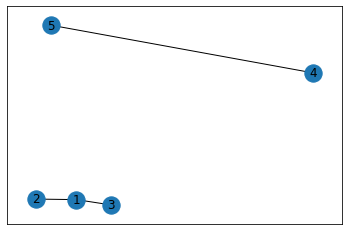

In [6]:
h = nx.Graph()

h.add_edge(1,2, weight=3)
h.add_edge(1,3, weight=4)

h.add_edge(4, 5, weight=0)

nx.draw_networkx(h)

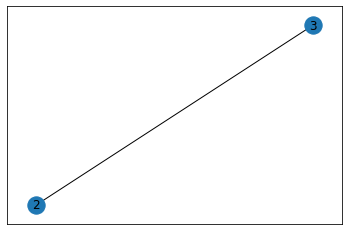

In [10]:
nx.draw_networkx()

In [6]:
# k=616

# G = nx.from_pandas_edgelist(results[['source', 'target', 'weight']], edge_attr='weight')

# backbone_nodes = pd.read_csv('../Results/All Backbones/modularit-airports.csv')
# backbone_nodes = backbone_nodes.sort_values(by='modularity', ascending=False)
# nodes = backbone_nodes['id'][:k].values
# backbone_graph = G.subgraph(nodes)

# df_degree = pd.DataFrame(G.degree(), columns=['id', 'degree'])
# df_degree = df_degree[df_degree['id'].isin(nodes)]

# df_weighted_degree = pd.DataFrame(G.degree(weight='weight'), columns=['id', 'weighted_degree'])
# df_weighted_degree = df_weighted_degree[df_weighted_degree['id'].isin(nodes)]

# backbone_nodes = backbone_nodes.merge(df_degree)
# backbone_nodes = backbone_nodes.merge(df_weighted_degree)

# df_components = pd.DataFrame(columns=['id', 'component'])
# for index, component in enumerate(nx.connected_components(backbone_graph)):
#     df_1 = pd.DataFrame(G.subgraph(component).nodes(), columns=['id'])
#     df_1['component'] = index + 1
#     df_components = pd.concat([df_1, df_components], ignore_index=True)
# backbone_nodes = backbone_nodes.merge(df_components, on='id')
# backbone_nodes = backbone_nodes.merge(labels)

# backbone_edges = nx.to_pandas_edgelist(backbone_graph)

# backbone_edges.to_csv('../Results/All Backbones/Airports/modularity-'+str(k)+'-edges-airports.csv', index=False)
# backbone_nodes.to_csv('../Results/All Backbones/Airports/modularity-'+str(k)+'-nodes-airports.csv', index=False)

